In [1]:
import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving PesquisaPerfis.csv to PesquisaPerfis.csv


In [2]:
import io
df = pd.read_csv(io.StringIO(uploaded['PesquisaPerfis.csv'].decode('utf-8')))

In [3]:
list(df.columns)

['Idade',
 'Sexo',
 'Região do Brasil (Local onde mora atualmente)',
 'Classe Comportamental',
 'Grau de Instrução',
 'Estado Civil',
 'Filhos',
 'Qual tipo de surdez?',
 'Tem implante coclear?',
 'Usa aparelho auditivo?',
 'Qual foi a primeira Língua?',
 'Qual a língua de preferência?',
 'Sabe Libras?',
 'Quando aprendeu Libras?',
 'Nível de Leitura em Português',
 'Nível de Escrita em Português',
 'Quando aprendeu Português?',
 'Oraliza?',
 'Faz leitura labial?',
 'Como se comunica com a família?',
 'Como se comunica com desconhecidos?',
 'Como se comunica com amigos?',
 'Usa algum app para se comunicar?',
 'Usa legendas?',
 'Compra em loja física?',
 'Compra online?',
 'Motivo de compra em loja física',
 'Motivo de compra em loja online ',
 'Preferência de Compra']

In [4]:
df.drop("Motivo de compra em loja física", axis = 1, inplace=True)
df.drop("Motivo de compra em loja online ", axis = 1, inplace=True)

In [5]:
df.head()

,Idade,Sexo,Região do Brasil (Local onde mora atualmente),Classe Comportamental,Grau de Instrução,Estado Civil,Filhos,Qual tipo de surdez?,Tem implante coclear?,Usa aparelho auditivo?,...,Oraliza?,Faz leitura labial?,Como se comunica com a família?,Como se comunica com desconhecidos?,Como se comunica com amigos?,Usa algum app para se comunicar?,Usa legendas?,Compra em loja física?,Compra online?,Preferência de Compra
0,26-30,F,Sudeste,C,Superior completo (ou graduação): concluiu o c...,União Estável,1,Adquirida,Não,Não,...,Não Oraliza,Sim,Português Escrito + LIBRAS,Português Escrito,LIBRAS,Sim,Sim,Sim,Não,Loja Física
1,26-30,F,Sudeste,C,Superior incompleto (ou graduação): não conclu...,Solteiro,0,Adquirida,Não,Não,...,Sim com familiares,Sim,Português Escrito + Gestos Caseiros + Oralização,Português Escrito + LIBRAS,LIBRAS,Sim,Sim,Sim,Sim,NaN
2,21-25,M,Nordeste,C,Superior incompleto (ou graduação): não conclu...,NaN,0,Congênita,Não,Já usou mas não usa mais,...,Sim com familiares,Sim,Português Escrito + LIBRAS + Oralização,Português Escrito,LIBRAS,Não,Sim,Sim,Não,Loja Física
3,41-45,M,Sudeste,B,Superior completo (ou graduação): concluiu o c...,Solteiro,0,Congênita,Sim,Já usou mas não usa mais,...,Sim com todos,Sim,Português Escrito + Oralização,Português Escrito + Oralização,LIBRAS + Oralização,Sim,Sim,Sim,Sim,Loja Online
4,31-35,M,Nordeste,C,Superior completo (ou graduação): concluiu o c...,Solteiro,0,Adquirida,Não,Já usou mas não usa mais,...,Sim com familiares,Sim,Português Escrito + Gestos Caseiros + Oralização,Português Escrito + Gestos Caseiros + Oralização,LIBRAS,Sim,Sim,Não,Sim,Loja Online


In [6]:
from sklearn import preprocessing

df_norm = df.copy()
scaler = preprocessing.MinMaxScaler()
df_norm[['Filhos']] = scaler.fit_transform(df_norm[['Filhos']])

In [7]:
df_encoded = pd.get_dummies(df_norm, columns=['Idade', 'Sexo', 'Região do Brasil (Local onde mora atualmente)',
       'Classe Comportamental', 'Grau de Instrução', 'Estado Civil',
       'Qual tipo de surdez?', 'Tem implante coclear?',
       'Usa aparelho auditivo?', 'Qual foi a primeira Língua?',
       'Qual a língua de preferência?', 'Sabe Libras?',
       'Quando aprendeu Libras?', 'Nível de Leitura em Português',
       'Nível de Escrita em Português', 'Quando aprendeu Português?',
       'Oraliza?', 'Faz leitura labial?', 'Como se comunica com a família?',
       'Como se comunica com desconhecidos?', 'Como se comunica com amigos?',
       'Usa algum app para se comunicar?', 'Usa legendas?',
       'Compra em loja física?', 'Compra online?', 'Preferência de Compra'])

In [8]:
df_encoded.head()

,Filhos,Idade_21-25,Idade_26-30,Idade_31-35,Idade_36-40,Idade_41-45,Idade_51-55,Sexo_F,Sexo_M,Região do Brasil (Local onde mora atualmente)_Centro-Oeste,...,Usa algum app para se comunicar?_Sim,Usa legendas?_Não,Usa legendas?_Sim,Compra em loja física?_Não,Compra em loja física?_Sim,Compra online?_Não,Compra online?_Sim,Preferência de Compra_Loja Física,Preferência de Compra_Loja Física + Loja Online,Preferência de Compra_Loja Online
0,0.5,False,True,False,False,False,False,True,False,False,...,True,False,True,False,True,True,False,True,False,False
1,0.0,False,True,False,False,False,False,True,False,False,...,True,False,True,False,True,False,True,False,False,False
2,0.0,True,False,False,False,False,False,False,True,False,...,False,False,True,False,True,True,False,True,False,False
3,0.0,False,False,False,False,True,False,False,True,False,...,True,False,True,False,True,False,True,False,False,True
4,0.0,False,False,True,False,False,False,False,True,False,...,True,False,True,True,False,False,True,False,False,True


## Elbow Method (clustering)
In cluster analysis, the **elbow method** is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

The method can be traced to speculation by [Robert L. Thorndike in 1953](https://link.springer.com/article/10.1007/BF02289263).

![elbow method](https://raw.githubusercontent.com/vcasadei/images/master/DataClustering_ElbowCriterion.jpg)

Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

The intuition is that increasing the number of clusters will naturally improve the fit (explain more of the variation), since there are more parameters (more clusters) to use, but that at some point this is over-fitting, and the elbow reflects this. For example, given data that actually consist of k labeled groups – for example, k points sampled with noise – clustering with more than k clusters will "explain" more of the variation (since it can use smaller, tighter clusters), but this is over-fitting, since it is subdividing the labeled groups into multiple clusters. The idea is that the first clusters will add much information (explain a lot of variation), since the data actually consist of that many groups (so these clusters are necessary), but once the number of clusters exceeds the actual number of groups in the data, the added information will drop sharply, because it is just subdividing the actual groups. Assuming this happens, there will be a sharp elbow in the graph of explained variation versus clusters: increasing rapidly up to k (under-fitting region), and then increasing slowly after k (over-fitting region).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

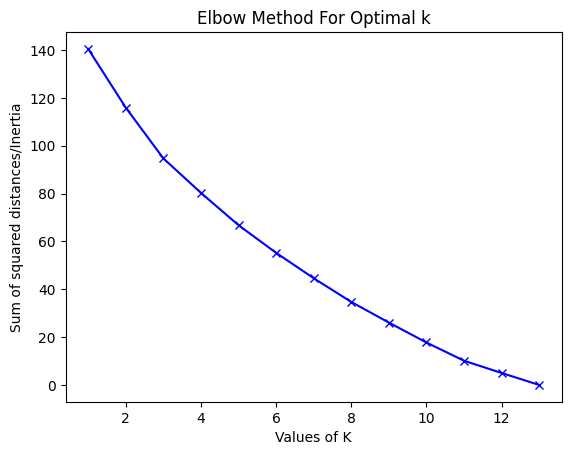

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
K = range(1,14)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters,n_init=100, max_iter=1000, algorithm='auto', random_state = 0)
 kmeans.fit(df_encoded)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=100, max_iter=10000, algorithm='auto', random_state = 0)
clusters = kmeans.fit_predict(df_encoded)
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((df,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [11]:
def highlight_greaterthan_1(s):
  # print(s.labels)
  if s.labels == 0:
    return ['background-color: red']*28
  elif s.labels == 1:
    return ['background-color: green']*28
  else:
    return ['background-color: blue']*28


labeledCustomers.style.apply(highlight_greaterthan_1, axis=1)

,Idade,Sexo,Região do Brasil (Local onde mora atualmente),Classe Comportamental,Grau de Instrução,Estado Civil,Filhos,Qual tipo de surdez?,Tem implante coclear?,Usa aparelho auditivo?,Qual foi a primeira Língua?,Qual a língua de preferência?,Sabe Libras?,Quando aprendeu Libras?,Nível de Leitura em Português,Nível de Escrita em Português,Quando aprendeu Português?,Oraliza?,Faz leitura labial?,Como se comunica com a família?,Como se comunica com desconhecidos?,Como se comunica com amigos?,Usa algum app para se comunicar?,Usa legendas?,Compra em loja física?,Compra online?,Preferência de Compra,labels
0,26-30,F,Sudeste,C,Superior completo (ou graduação): concluiu o curso de ensino superior (bacharelado ou licenciatura),União Estável,1,Adquirida,Não,Não,Português,Libras,Sim,Infância,Avançado,Avançado,Infância,Não Oraliza,Sim,Português Escrito + LIBRAS,Português Escrito,LIBRAS,Sim,Sim,Sim,Não,Loja Física,1
1,26-30,F,Sudeste,C,Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),Solteiro,0,Adquirida,Não,Não,Português,Libras,Sim,Adolescência,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + Gestos Caseiros + Oralização,Português Escrito + LIBRAS,LIBRAS,Sim,Sim,Sim,Sim,nan,2
2,21-25,M,Nordeste,C,Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),nan,0,Congênita,Não,Já usou mas não usa mais,Libras,Libras,Sim,Infância,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + LIBRAS + Oralização,Português Escrito,LIBRAS,Não,Sim,Sim,Não,Loja Física,1
3,41-45,M,Sudeste,B,Superior completo (ou graduação): concluiu o curso de ensino superior (bacharelado ou licenciatura),Solteiro,0,Congênita,Sim,Já usou mas não usa mais,Português,Português,Sim,Adulto,Avançado,Avançado,Infância,Sim com todos,Sim,Português Escrito + Oralização,Português Escrito + Oralização,LIBRAS + Oralização,Sim,Sim,Sim,Sim,Loja Online,2
4,31-35,M,Nordeste,C,Superior completo (ou graduação): concluiu o curso de ensino superior (bacharelado ou licenciatura),Solteiro,0,Adquirida,Não,Já usou mas não usa mais,Português,Libras,Sim,Infância,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + Gestos Caseiros + Oralização,Português Escrito + Gestos Caseiros + Oralização,LIBRAS,Sim,Sim,Não,Sim,Loja Online,2
5,31-35,M,Sudeste,B,Superior completo (ou graduação): concluiu o curso de ensino superior (bacharelado ou licenciatura),União Estável,2,Congênita,Não,Já usou mas não usa mais,Libras,Libras,Sim,Infância,Avançado,Básico,Infância,Sim com familiares,Sim,LIBRAS + Oralização,Português Escrito,LIBRAS,Sim,Sim,Sim,Sim,nan,1
6,26-30,F,Nordeste,C,Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),Solteiro,0,Congênita,Não,Já usou mas não usa mais,Libras,Libras,Sim,Infância,Avançado,Avançado,Infância,Não Oraliza,Sim,Gestos Caseiros + Oralização,Português Escrito,LIBRAS,Sim,Sim,Sim,Sim,Loja Online,1
7,31-35,F,Sudeste,C,Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),União Estável,0,Congênita,Não,Já usou mas não usa mais,Libras,Libras,Sim,Infância,Avançado,Avançado,Infância,Não Oraliza,Sim,Português Escrito + Gestos Caseiros,Português Escrito,LIBRAS,Sim,Sim,Sim,Sim,Loja Física,1
8,51-55,M,Sul,B,Mestrado: pós-graduação que garante o grau de mestre em determinada área,Casado,0,Congênita,Não,Já usou mas não usa mais,Português,Libras,Sim,Adolescência,Avançado,Avançado,Infância,Sim com familiares,Sim,Português Escrito + Gestos Caseiros + Oralização,Português Escrito,LIBRAS,Não,Não,Sim,Sim,Loja Física + Loja Online,2
9,21-25,M,Sul,CD,Superior incompleto (ou graduação): não concluiu o curso de ensino superior (bacharelado ou licenciatura),Solteiro,0,Congênita,Não,Não,Libras,Libras,Sim,Infância,Avançado,Básico,Infância,Não Oraliza,Não,Português Escrito,Português Escrito,LIBRAS,Sim,Sim,Sim,Sim,Loja Física,1


In [ ]:
labeledCustomers.to_csv('clusters.csv',encoding='utf-8-sig')